# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [2]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [3]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = list(range(num_training, num_training + num_validation))
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = list(range(num_training))
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = list(range(num_test))
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [4]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

iteration 0 / 10000: loss 9.024736
iteration 1000 / 10000: loss 6.111922
iteration 2000 / 10000: loss 6.020624
iteration 3000 / 10000: loss 6.176415
iteration 4000 / 10000: loss 6.127524
iteration 5000 / 10000: loss 6.055987
iteration 6000 / 10000: loss 6.211270
iteration 7000 / 10000: loss 6.011799
iteration 8000 / 10000: loss 6.196637
iteration 9000 / 10000: loss 6.102406
('Learning_rate: ', 0.0007, 'Regularization: ', 7, 'Batch Size:', 900)
('Validation Accuracy', 0.45100000000000001)
iteration 0 / 10000: loss 8.996538
iteration 1000 / 10000: loss 6.129401
iteration 2000 / 10000: loss 6.031069
iteration 3000 / 10000: loss 6.175455
iteration 4000 / 10000: loss 6.009128
iteration 5000 / 10000: loss 6.133261
iteration 6000 / 10000: loss 6.104436
iteration 7000 / 10000: loss 6.024485
iteration 8000 / 10000: loss 6.084744
iteration 9000 / 10000: loss 6.162093
('Learning_rate: ', 0.0007, 'Regularization: ', 7, 'Batch Size:', 1000)
('Validation Accuracy', 0.45200000000000001)
iteration 0 /

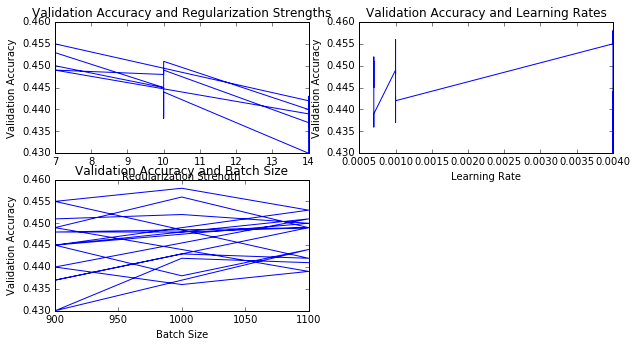

In [8]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [7e-4, 1e-3, 4e-3]
regularization_strengths = [7, 10, 14]

results = {}
best_val = -1
best_svm = None
lrs = []
regs = []
bss = []
val_accs = []

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for learning_rate in learning_rates:
    for reg in regularization_strengths:
        for batch_size in [900, 1000, 1100]:
            svm = LinearSVM()
            svm.train(X_train_feats, y_train, learning_rate=learning_rate, reg=reg, 
                  num_iters=10000, batch_size=batch_size, verbose=True)
            y_train_pred = svm.predict(X_train_feats)
            training_accuracy = np.mean(y_train_pred == y_train)
            y_val_pred = svm.predict(X_val_feats)
            validation_accuracy = np.mean(y_val_pred == y_val)
            results[(learning_rate, reg)] = (training_accuracy, validation_accuracy)
            print('Learning_rate: ', learning_rate, 'Regularization: ', reg, 'Batch Size:', batch_size)
            print('Validation Accuracy', validation_accuracy)
            if validation_accuracy > best_val:
                best_val = validation_accuracy
                best_svm = svm
            lrs.append(learning_rate)
            regs.append(reg)
            bss.append(batch_size)
            val_accs.append(validation_accuracy)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

plt.subplot(3, 2, 2)
plt.plot(lrs, val_accs)
plt.title('Validation Accuracy and Learning Rates')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy')

plt.subplot(3, 2, 1)
plt.plot(regs, val_accs)
plt.title('Validation Accuracy and Regularization Strengths')
plt.xlabel('Regularization Strength')
plt.ylabel('Validation Accuracy')

plt.subplot(3, 2, 3)
plt.plot(bss, val_accs)
plt.title('Validation Accuracy and Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Validation Accuracy')

In [9]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.473


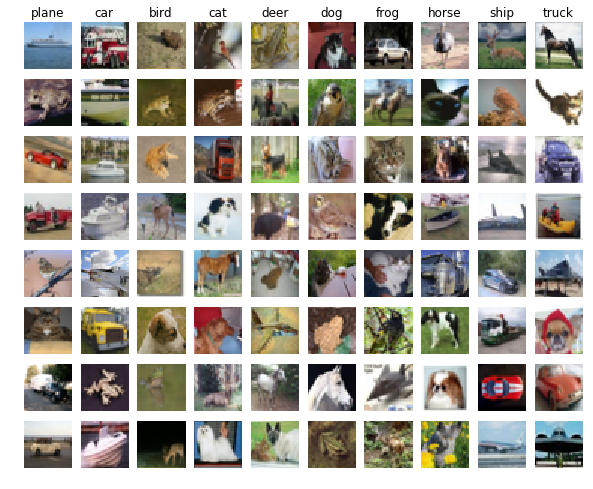

In [6]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [11]:
print(X_train_feats.shape)

(49000, 155)


iteration 0 / 30000: loss 2.302585
iteration 100 / 30000: loss 2.302629
iteration 200 / 30000: loss 2.111796
iteration 300 / 30000: loss 1.835135
iteration 400 / 30000: loss 1.625371
iteration 500 / 30000: loss 1.567742
iteration 600 / 30000: loss 1.423346
iteration 700 / 30000: loss 1.398233
iteration 800 / 30000: loss 1.306010
iteration 900 / 30000: loss 1.342851
iteration 1000 / 30000: loss 1.317730
iteration 1100 / 30000: loss 1.467937
iteration 1200 / 30000: loss 1.297365
iteration 1300 / 30000: loss 1.415733
iteration 1400 / 30000: loss 1.265832
iteration 1500 / 30000: loss 1.106042
iteration 1600 / 30000: loss 1.297565
iteration 1700 / 30000: loss 1.186362
iteration 1800 / 30000: loss 1.210031
iteration 1900 / 30000: loss 1.168698
iteration 2000 / 30000: loss 1.204918
iteration 2100 / 30000: loss 1.268082
iteration 2200 / 30000: loss 1.244037
iteration 2300 / 30000: loss 1.146771
iteration 2400 / 30000: loss 1.175675
iteration 2500 / 30000: loss 1.272606
iteration 2600 / 30000: 

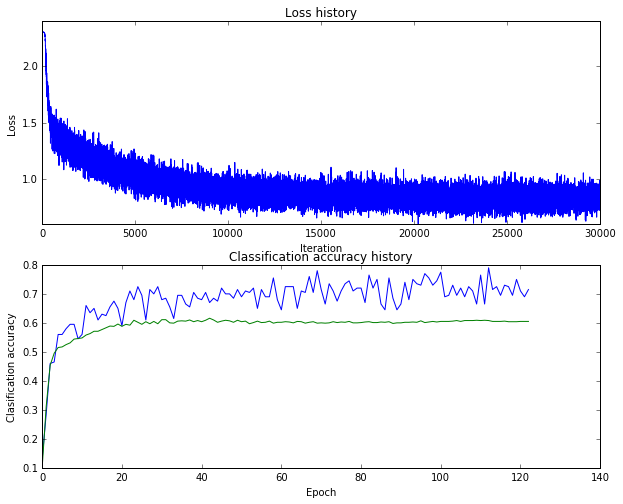

iteration 0 / 30000: loss 2.302585
iteration 100 / 30000: loss 2.302060
iteration 200 / 30000: loss 2.056091
iteration 300 / 30000: loss 1.754317
iteration 400 / 30000: loss 1.583190
iteration 500 / 30000: loss 1.573910
iteration 600 / 30000: loss 1.586703
iteration 700 / 30000: loss 1.364208
iteration 800 / 30000: loss 1.473845
iteration 900 / 30000: loss 1.419882
iteration 1000 / 30000: loss 1.320836
iteration 1100 / 30000: loss 1.498505
iteration 1200 / 30000: loss 1.422364
iteration 1300 / 30000: loss 1.322810
iteration 1400 / 30000: loss 1.278398
iteration 1500 / 30000: loss 1.201413
iteration 1600 / 30000: loss 1.147625
iteration 1700 / 30000: loss 1.237232
iteration 1800 / 30000: loss 1.315277
iteration 1900 / 30000: loss 1.262703
iteration 2000 / 30000: loss 1.119582
iteration 2100 / 30000: loss 1.265516
iteration 2200 / 30000: loss 1.170892
iteration 2300 / 30000: loss 1.234325
iteration 2400 / 30000: loss 1.105662
iteration 2500 / 30000: loss 1.163189
iteration 2600 / 30000: 

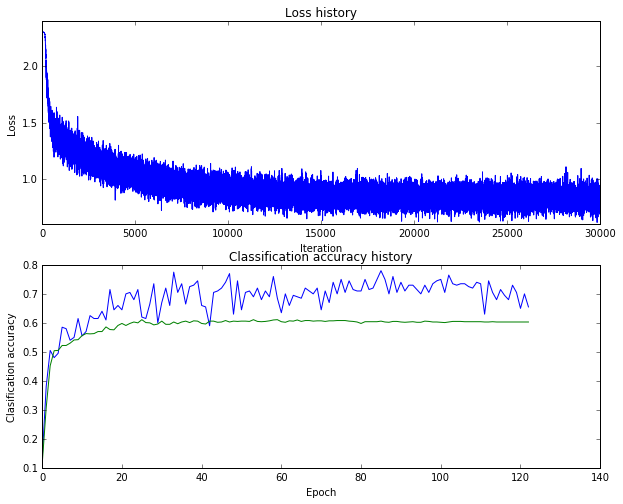

iteration 0 / 30000: loss 2.302585
iteration 100 / 30000: loss 2.302615
iteration 200 / 30000: loss 2.119696
iteration 300 / 30000: loss 1.635849
iteration 400 / 30000: loss 1.660525
iteration 500 / 30000: loss 1.537140
iteration 600 / 30000: loss 1.321677
iteration 700 / 30000: loss 1.410287
iteration 800 / 30000: loss 1.233534
iteration 900 / 30000: loss 1.544969
iteration 1000 / 30000: loss 1.291927
iteration 1100 / 30000: loss 1.375603
iteration 1200 / 30000: loss 1.316705
iteration 1300 / 30000: loss 1.307177
iteration 1400 / 30000: loss 1.280425
iteration 1500 / 30000: loss 1.326228
iteration 1600 / 30000: loss 1.277772
iteration 1700 / 30000: loss 1.223599
iteration 1800 / 30000: loss 1.283444
iteration 1900 / 30000: loss 1.201794
iteration 2000 / 30000: loss 1.235763
iteration 2100 / 30000: loss 1.100777
iteration 2200 / 30000: loss 1.139357
iteration 2300 / 30000: loss 1.180071
iteration 2400 / 30000: loss 1.082729
iteration 2500 / 30000: loss 1.227524
iteration 2600 / 30000: 

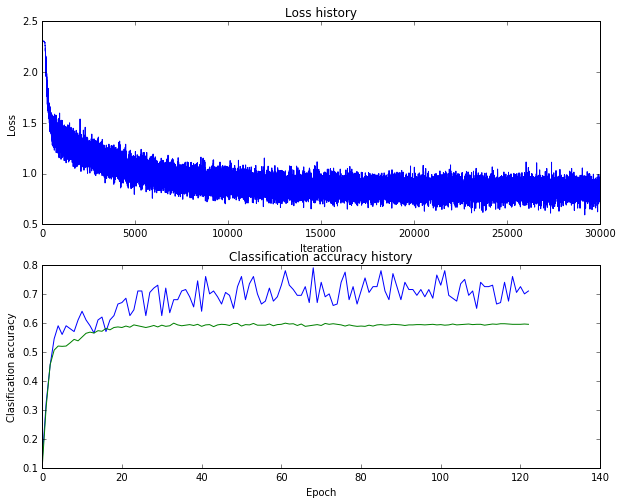

iteration 0 / 30000: loss 2.302585
iteration 100 / 30000: loss 2.300993
iteration 200 / 30000: loss 2.104264
iteration 300 / 30000: loss 1.713251
iteration 400 / 30000: loss 1.556134
iteration 500 / 30000: loss 1.495190
iteration 600 / 30000: loss 1.442020
iteration 700 / 30000: loss 1.343404
iteration 800 / 30000: loss 1.423375
iteration 900 / 30000: loss 1.462483
iteration 1000 / 30000: loss 1.421949
iteration 1100 / 30000: loss 1.336630
iteration 1200 / 30000: loss 1.281326
iteration 1300 / 30000: loss 1.367345
iteration 1400 / 30000: loss 1.230002
iteration 1500 / 30000: loss 1.236470
iteration 1600 / 30000: loss 1.388382
iteration 1700 / 30000: loss 1.214737
iteration 1800 / 30000: loss 1.160496
iteration 1900 / 30000: loss 1.381232
iteration 2000 / 30000: loss 1.218782
iteration 2100 / 30000: loss 1.273644
iteration 2200 / 30000: loss 1.236850
iteration 2300 / 30000: loss 1.292138
iteration 2400 / 30000: loss 1.209988
iteration 2500 / 30000: loss 1.158183
iteration 2600 / 30000: 

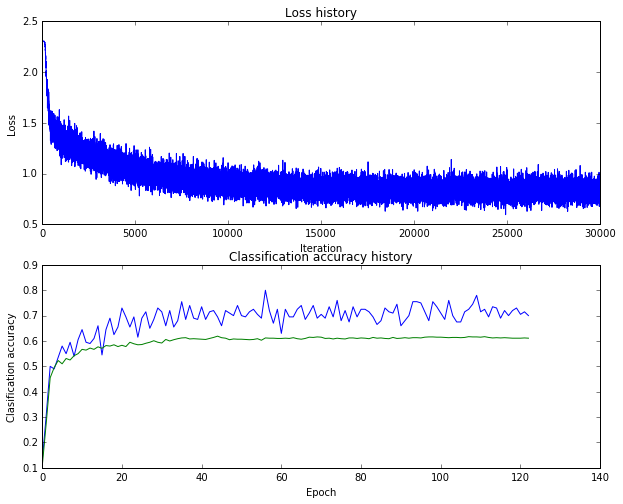

iteration 0 / 30000: loss 2.302585
iteration 100 / 30000: loss 2.303305
iteration 200 / 30000: loss 2.070342
iteration 300 / 30000: loss 1.756810
iteration 400 / 30000: loss 1.570519
iteration 500 / 30000: loss 1.541219
iteration 600 / 30000: loss 1.299798
iteration 700 / 30000: loss 1.391924
iteration 800 / 30000: loss 1.365550
iteration 900 / 30000: loss 1.328938
iteration 1000 / 30000: loss 1.485172
iteration 1100 / 30000: loss 1.294181
iteration 1200 / 30000: loss 1.190568
iteration 1300 / 30000: loss 1.429905
iteration 1400 / 30000: loss 1.236356
iteration 1500 / 30000: loss 1.194558
iteration 1600 / 30000: loss 1.270089
iteration 1700 / 30000: loss 1.257028
iteration 1800 / 30000: loss 1.282945
iteration 1900 / 30000: loss 1.224610
iteration 2000 / 30000: loss 1.265253
iteration 2100 / 30000: loss 1.333609
iteration 2200 / 30000: loss 1.173944
iteration 2300 / 30000: loss 1.228281
iteration 2400 / 30000: loss 1.279730
iteration 2500 / 30000: loss 1.203623
iteration 2600 / 30000: 

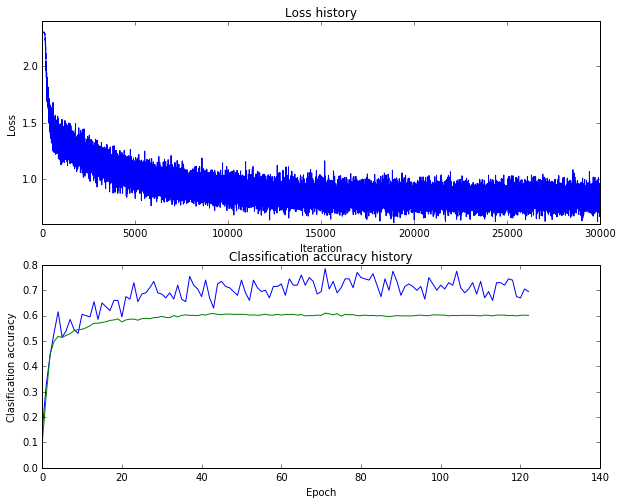

iteration 0 / 30000: loss 2.302585
iteration 100 / 30000: loss 2.302600
iteration 200 / 30000: loss 2.044248
iteration 300 / 30000: loss 1.742717
iteration 400 / 30000: loss 1.601630
iteration 500 / 30000: loss 1.414790
iteration 600 / 30000: loss 1.326741
iteration 700 / 30000: loss 1.349719
iteration 800 / 30000: loss 1.334868
iteration 900 / 30000: loss 1.401962
iteration 1000 / 30000: loss 1.304901
iteration 1100 / 30000: loss 1.261836
iteration 1200 / 30000: loss 1.322073
iteration 1300 / 30000: loss 1.395998
iteration 1400 / 30000: loss 1.355002
iteration 1500 / 30000: loss 1.259754
iteration 1600 / 30000: loss 1.332756
iteration 1700 / 30000: loss 1.317602
iteration 1800 / 30000: loss 1.268158
iteration 1900 / 30000: loss 1.244351
iteration 2000 / 30000: loss 1.334934
iteration 2100 / 30000: loss 1.251136
iteration 2200 / 30000: loss 1.270119
iteration 2300 / 30000: loss 1.084494
iteration 2400 / 30000: loss 1.203878
iteration 2500 / 30000: loss 1.145281
iteration 2600 / 30000: 

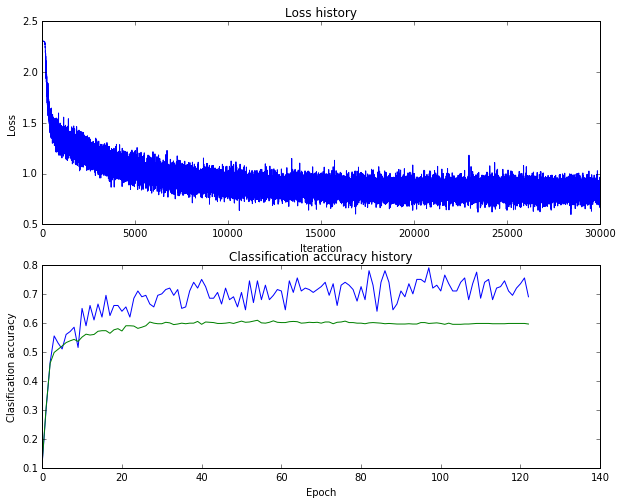

iteration 0 / 30000: loss 2.302585
iteration 100 / 30000: loss 2.303337
iteration 200 / 30000: loss 2.059142
iteration 300 / 30000: loss 1.742941
iteration 400 / 30000: loss 1.506411
iteration 500 / 30000: loss 1.580485
iteration 600 / 30000: loss 1.526591
iteration 700 / 30000: loss 1.335142
iteration 800 / 30000: loss 1.564655
iteration 900 / 30000: loss 1.302655
iteration 1000 / 30000: loss 1.352355
iteration 1100 / 30000: loss 1.329509
iteration 1200 / 30000: loss 1.321459
iteration 1300 / 30000: loss 1.212487
iteration 1400 / 30000: loss 1.259787
iteration 1500 / 30000: loss 1.483561
iteration 1600 / 30000: loss 1.260486
iteration 1700 / 30000: loss 1.204531
iteration 1800 / 30000: loss 1.244287
iteration 1900 / 30000: loss 1.143046
iteration 2000 / 30000: loss 1.221541
iteration 2100 / 30000: loss 1.225944
iteration 2200 / 30000: loss 1.122363
iteration 2300 / 30000: loss 1.213748
iteration 2400 / 30000: loss 1.076341
iteration 2500 / 30000: loss 1.112050
iteration 2600 / 30000: 

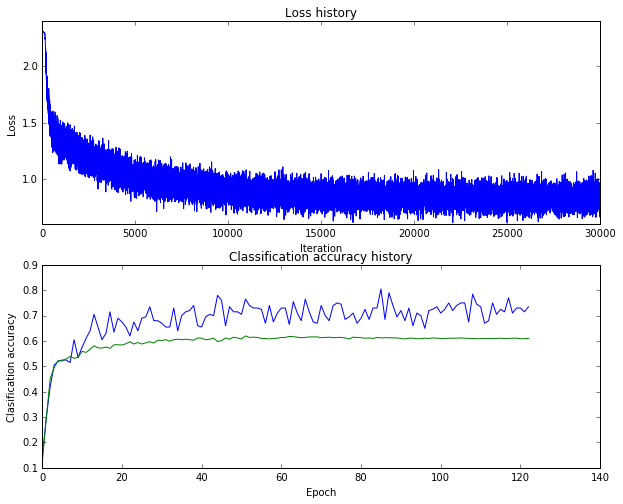

iteration 0 / 30000: loss 2.302585
iteration 100 / 30000: loss 2.300497
iteration 200 / 30000: loss 2.042861
iteration 300 / 30000: loss 1.696661
iteration 400 / 30000: loss 1.575435
iteration 500 / 30000: loss 1.475965
iteration 600 / 30000: loss 1.343251
iteration 700 / 30000: loss 1.412246
iteration 800 / 30000: loss 1.428526
iteration 900 / 30000: loss 1.326348
iteration 1000 / 30000: loss 1.305962
iteration 1100 / 30000: loss 1.342990
iteration 1200 / 30000: loss 1.232475
iteration 1300 / 30000: loss 1.343164
iteration 1400 / 30000: loss 1.297840
iteration 1500 / 30000: loss 1.386460
iteration 1600 / 30000: loss 1.308868
iteration 1700 / 30000: loss 1.314246
iteration 1800 / 30000: loss 1.255384
iteration 1900 / 30000: loss 1.249108
iteration 2000 / 30000: loss 1.130778
iteration 2100 / 30000: loss 1.204255
iteration 2200 / 30000: loss 1.188667
iteration 2300 / 30000: loss 1.144227
iteration 2400 / 30000: loss 1.294632
iteration 2500 / 30000: loss 1.202967
iteration 2600 / 30000: 

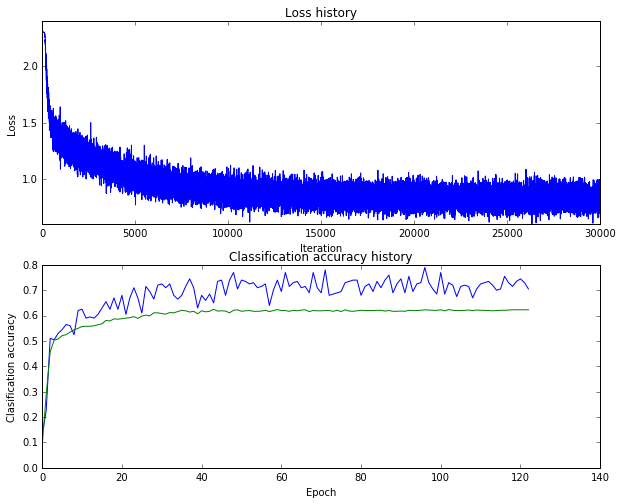

iteration 0 / 30000: loss 2.302585
iteration 100 / 30000: loss 2.300831
iteration 200 / 30000: loss 2.068784
iteration 300 / 30000: loss 1.691525
iteration 400 / 30000: loss 1.747099
iteration 500 / 30000: loss 1.469949
iteration 600 / 30000: loss 1.344011
iteration 700 / 30000: loss 1.208484
iteration 800 / 30000: loss 1.419166
iteration 900 / 30000: loss 1.347252
iteration 1000 / 30000: loss 1.312747
iteration 1100 / 30000: loss 1.319276
iteration 1200 / 30000: loss 1.219670
iteration 1300 / 30000: loss 1.386809
iteration 1400 / 30000: loss 1.260353
iteration 1500 / 30000: loss 1.220675
iteration 1600 / 30000: loss 1.283769
iteration 1700 / 30000: loss 1.303949
iteration 1800 / 30000: loss 1.229338
iteration 1900 / 30000: loss 1.265770
iteration 2000 / 30000: loss 1.157555
iteration 2100 / 30000: loss 1.290517
iteration 2200 / 30000: loss 1.182259
iteration 2300 / 30000: loss 1.218141
iteration 2400 / 30000: loss 1.102509
iteration 2500 / 30000: loss 1.301469
iteration 2600 / 30000: 

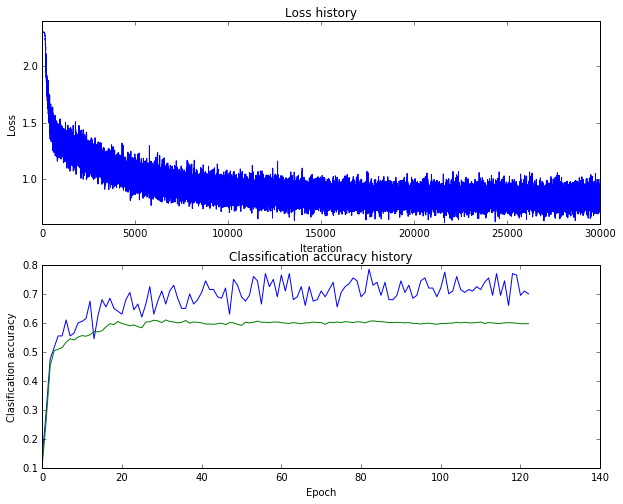

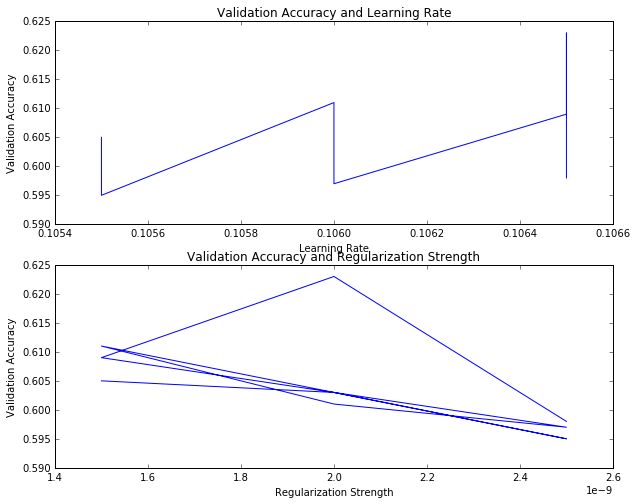

In [35]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

#net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None
best_val = -1
val_accs = []
lrs = []
regs = []
learning_rates = [1.055e-1, 1.06e-1, 1.065e-1]
regularization_strengths = [1.5e-9, 2e-9, 2.5e-9]
################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
for learning_rate in learning_rates:
    for reg in regularization_strengths:
        net = TwoLayerNet(input_dim, hidden_dim, num_classes)
        stats = net.train(X_train_feats, y_train, X_val_feats, y_val, num_iters=30000,
                         batch_size=200, learning_rate=learning_rate, learning_rate_decay=.95,
                         reg=reg, verbose=True)
        val_acc = np.mean(np.equal(net.predict(X_val_feats), y_val))
        if val_acc > best_val:
            best_val = val_acc
            best_net = net
        val_accs.append(val_acc)
        lrs.append(learning_rate)
        regs.append(reg)
        print('Learning Rate:', learning_rate, 'Regularization:', reg)
        print('Validation Accuracy', val_acc)
        plt.subplot(2, 1, 1)
        plt.plot(stats['loss_history'])
        plt.title('Loss history')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')

        plt.subplot(2, 1, 2)
        plt.plot(stats['train_acc_history'], label='train')
        plt.plot(stats['val_acc_history'], label='val')
        plt.title('Classification accuracy history')
        plt.xlabel('Epoch')
        plt.ylabel('Clasification accuracy')
        plt.show()

plt.subplot(2, 1, 1)
plt.plot(lrs, val_accs)
plt.title('Validation Accuracy and Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(regs, val_accs)
plt.title('Validation Accuracy and Regularization Strength')
plt.xlabel('Regularization Strength')
plt.ylabel('Validation Accuracy')
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

In [36]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

#best_net1 = best_net
print(best_val)
test_acc = np.mean((best_net.predict(X_test_feats) == y_test))
print(test_acc)

0.623
0.591


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!